In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
! wget --no-check-certificate -P ./ -N https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_test.csv
! wget --no-check-certificate -P ./ -N https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_train.csv

--2018-11-09 11:45:15--  https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_test.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.58.65
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.58.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98797998 (94M) [text/csv]
Saving to: ‘./fmnist_test.csv’

100%[======================================>] 98,797,998  63.0MB/s   in 1.5s   

2018-11-09 11:45:16 (63.0 MB/s) - ‘./fmnist_test.csv’ saved [98797998/98797998]

--2018-11-09 11:45:17--  https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_train.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.60.0
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.60.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1099000000 (1.0G) [text/csv]
Saving to: ‘./fmnist_train.csv’

100%[======================

In [42]:
training_data = np.loadtxt('./fmnist_train.csv', delimiter=",")
training_img = training_data[:,1:]
training_lab = training_data[:,0]

test_img = np.loadtxt('./fmnist_test.csv', delimiter=",")

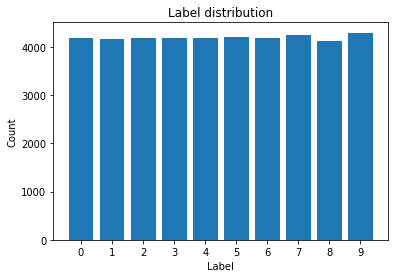

In [64]:
# plot label distribution of training set

plt.title('Label distribution')
plt.bar(range(10), np.bincount(training_lab.astype('int64')))
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(10))
plt.grid(False)

In [ ]:
training_img, x_valid, training_lab, y_valid = train_test_split(training_img, training_lab, test_size=0.25)

In [43]:
training_img = training_img.reshape(training_img.shape[0], 28, 28)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28)
test_img = test_img.reshape(test_img.shape[0], 28, 28)

In [44]:
print("Training set (images) shape: {shape}".format(shape=training_img.shape))
print("Training set (labels) shape: {shape}".format(shape=training_lab.shape))
print("Training set (images) shape: {shape}".format(shape=x_valid.shape))
print("Training set (images) shape: {shape}".format(shape=y_valid.shape))


print("Test set (images) shape: {shape}".format(shape=test_img.shape))

Training set (images) shape: (42000, 28, 28)
Training set (labels) shape: (42000,)
Training set (images) shape: (14000, 28, 28)
Training set (images) shape: (14000,)
Test set (images) shape: (14000, 28, 28)


In [45]:
training_img = training_img.astype('float32')/255
x_valid = x_valid.astype('float32')/255
test_img = test_img.astype('float32')/255

In [46]:
training_img = training_img.reshape(training_img.shape[0],training_img.shape[1],training_img.shape[2],1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1],x_valid.shape[2],1)
test_img = test_img.reshape(test_img.shape[0],test_img.shape[1],test_img.shape[2],1)

In [47]:
print("Training set (images) shape: {shape}".format(shape=training_img.shape))
print("Training set (labels) shape: {shape}".format(shape=training_lab.shape))
print("Training set (images) shape: {shape}".format(shape=x_valid.shape))
print("Training set (labels) shape: {shape}".format(shape=y_valid.shape))


print("Test set (images) shape: {shape}".format(shape=test_img.shape))

Training set (images) shape: (42000, 28, 28, 1)
Training set (labels) shape: (42000,)
Training set (images) shape: (14000, 28, 28, 1)
Training set (labels) shape: (14000,)
Test set (images) shape: (14000, 28, 28, 1)


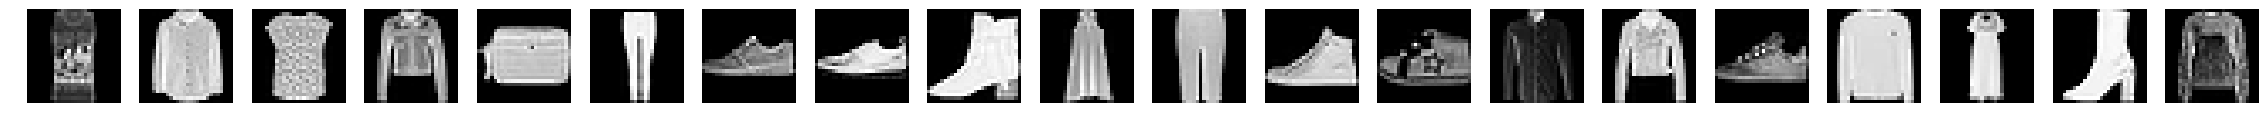

In [15]:
sample_size = 20

idx_s = np.random.randint(0,len(training_img), sample_size)
fig, ax = plt.subplots(1, sample_size, figsize=(sample_size*2, 2))

for i in range(sample_size):
    ax[i].set_axis_off()
    ax[i].imshow(np.reshape(training_img[idx_s][i], [28,28]),cmap="gray")

In [82]:
# Set parameter
 
batch_size = 256
epochs = 20#고정

In [ ]:
# model = Sequential()
# model.add(Dense(10, input_shape=(784,), activation='softmax'))
# model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [83]:
model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total para

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(momentum=0.9), metrics=['accuracy'])
train_model = model.fit(training_img, training_lab, epochs=epochs, verbose=2, validation_data=(x_valid, y_valid))

Train on 42000 samples, validate on 14000 samples
Epoch 1/20


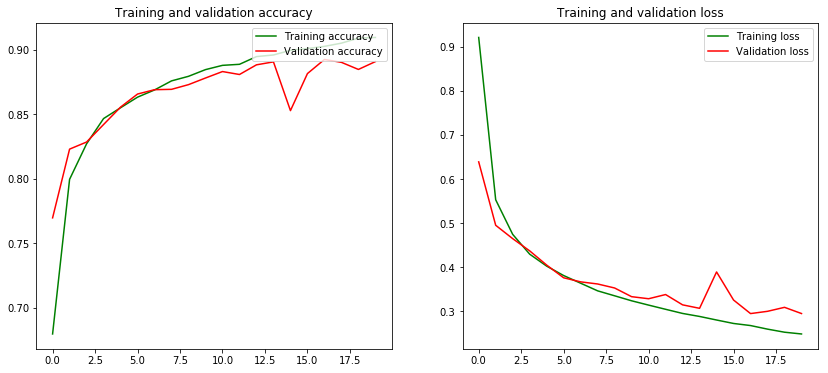

In [81]:
def plot_result(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    fig, ax = plt.subplots(1,2, figsize=(14,6))
    
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend(loc=1)
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend(loc=1)
    plt.show()
    
plot_result(train_model)

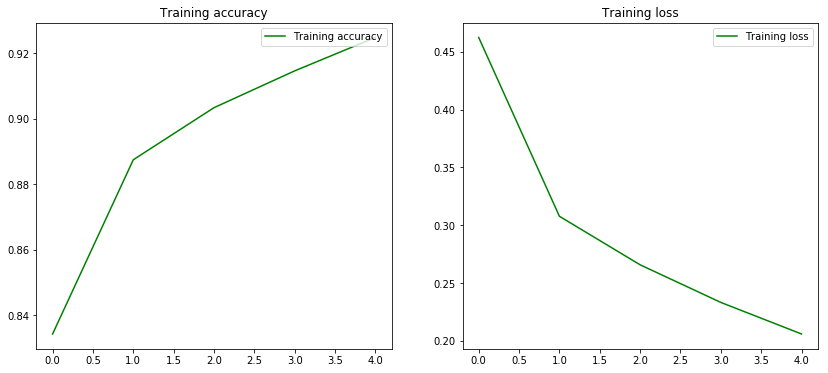

In [51]:
history = train_model.history
# plot results
hist = train_model.history
acc = hist['acc']
loss = hist['loss']
epochs = range(len(acc))
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].set_title('Training accuracy')
ax[0].legend(loc=1)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].set_title('Training loss')
ax[1].legend(loc=1)
plt.show()

In [ ]:
# result = model.predict_classes(test_img)
# np.savetxt("fmnist_result.csv", result, delimiter=",")